# Predictions using LightGBM

# Data Loading and Preprocessing

In [ ]:
from lightgbm import LGBMClassifier

data = pd.read_csv('/content/data_with_predictions.csv')

# Check for missing values and clean data
print("Missing values:\n", data.isnull().sum())
data.dropna(inplace=True)

Missing values:
 date                 0
Open                 0
High                 0
Low                  0
Close                0
Shares Traded        0
Turnover (â¹ Cr)    0
news                 0
Sentiment            0
dtype: int64


# Feature Selection and Target Definition

1. The features used for the prediction are:
* Sentiment (sentiment prediction from earlier tasks).
* Stock trading indicators like Shares Traded, Turnover, Open, High, and Low.
2. The target variable (Target) is defined as a binary classification problem:
* 1: Closing price increases the next day (Close.shift(-1) > Close).
* 0: Closing price decreases or remains the same.

In [ ]:
features = ['Sentiment', 'Shares Traded ', 'Turnover (â¹ Cr)', 'Open ', 'High ', 'Low ']
target = 'Close '

data['Target'] = np.where(data['Close '].shift(-1) > data['Close '], 1, 0)

X = data[features]
y = data['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# LightGBM Model Initialization and Training

In [ ]:
# Initialize the LightGBM model
model = LGBMClassifier(is_unbalance=True, random_state=42, n_estimators=200, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 242, number of negative: 16102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 16344, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.014807 -> initscore=-4.197761
[LightGBM] [Info] Start training from score -4.197761


# Model Evaluation

In [ ]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Confusion Matrix:
[[2956 1070]
 [  60    0]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      4026
           1       0.00      0.00      0.00        60

    accuracy                           0.72      4086
   macro avg       0.49      0.37      0.42      4086
weighted avg       0.97      0.72      0.83      4086


Accuracy: 0.72


# Visualize Confusion Matrix

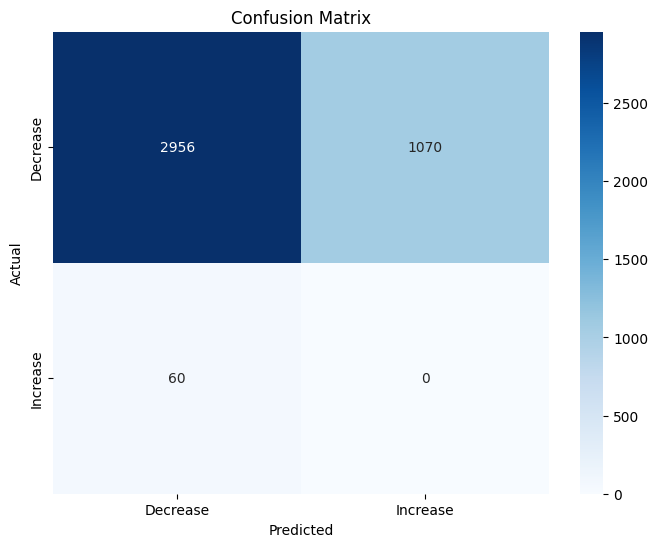

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Visualization

<ipython-input-21-16909cab22b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices], y=np.array(features)[sorted_indices], palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


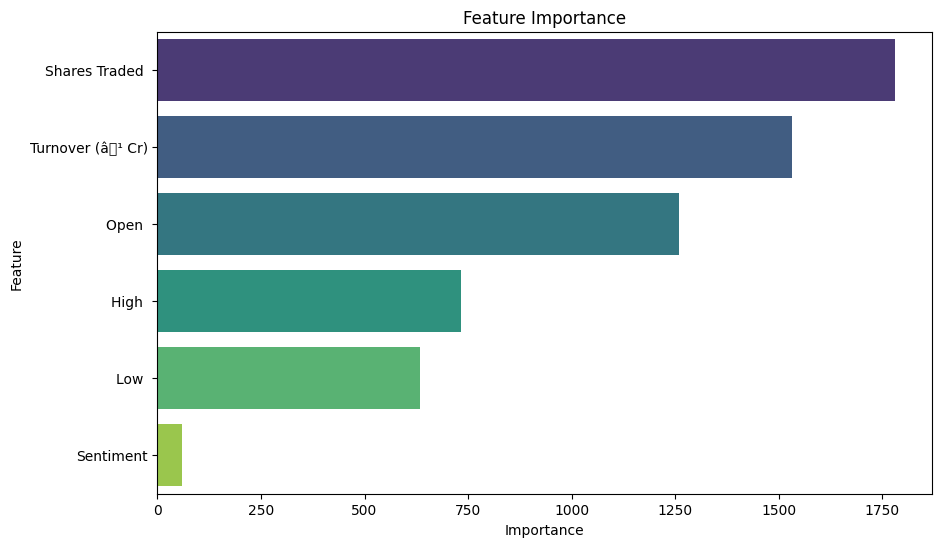

In [ ]:
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=np.array(features)[sorted_indices], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()